In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping


# CSV 파일 로드
data = pd.read_csv('climate_change_dataset.csv')

##1

In [2]:
avg_df = data.groupby(['Year', 'Country']).mean()

avg_df.reset_index(inplace=True)
# 결과 출력
avg_df

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2000,Argentina,16.900000,3.900000,4.000000,2047.000000,5.648776e+08,15.500000,11.000000,18.400000
1,2000,Australia,11.933333,10.466667,2.266667,2033.333333,8.317765e+08,25.566667,9.666667,58.133333
2,2000,Brazil,31.200000,14.600000,3.700000,803.000000,2.553400e+08,28.300000,9.000000,21.700000
3,2000,Canada,19.300000,8.850000,2.650000,1383.000000,4.149313e+08,22.750000,8.500000,42.100000
4,2000,China,26.200000,6.925000,2.200000,1849.000000,6.920547e+08,36.675000,5.250000,44.525000
...,...,...,...,...,...,...,...,...,...,...
335,2023,Mexico,20.000000,9.750000,2.750000,1772.500000,8.735258e+08,18.150000,1.500000,24.450000
336,2023,Russia,30.900000,11.400000,3.300000,979.000000,1.012844e+09,27.600000,13.000000,60.200000
337,2023,South Africa,19.600000,15.000000,2.700000,1260.500000,9.476245e+08,38.750000,9.000000,32.000000
338,2023,UK,30.300000,14.300000,2.750000,1503.000000,9.233504e+08,24.700000,6.000000,53.350000


In [3]:
# 특성과 타겟 분리
X =avg_df[['Year', 'Country', 'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)',
          'Rainfall (mm)', 'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)']]
y = avg_df['Sea Level Rise (mm)']

# 카테고리형 데이터를 숫자로 변환 (예: Country)
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
# RNN 모델 정의
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# RNN 학습 데이터 준비 (3D 형태로 변환)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# RNN 학습
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# RNN 예측 및 평가
y_pred_rnn = rnn_model.predict(X_test_rnn)
print("RNN Mean Squared Error:", mean_squared_error(y_test, y_pred_rnn))
print("RNN R2 Score:", r2_score(y_test, y_pred_rnn))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 7.7120 - mae: 2.6460 - val_loss: 7.1509 - val_mae: 2.5366
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0845 - mae: 2.3090 - val_loss: 3.3215 - val_mae: 1.6221
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.4371 - mae: 1.2772 - val_loss: 1.2472 - val_mae: 0.9094
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2048 - mae: 0.9146 - val_loss: 1.4698 - val_mae: 0.9988
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.1322 - mae: 0.8481 - val_loss: 0.8942 - val_mae: 0.7649
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8268 - mae: 0.7214 - val_loss: 0.8311 - val_mae: 0.7343
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.7396 - mae: 0.6999 - val_loss: 0.8193 - val_mae: 0.7279
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7484 - mae: 0.6981 - val_loss: 0.7820 - val_mae: 0.7137
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6621 - mae: 0.6536 - val_loss: 0

In [5]:
# DNN 모델 정의
dnn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# DNN 학습
dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# DNN 예측 및 평가
y_pred_dnn = dnn_model.predict(X_test)
print("DNN Mean Squared Error:", mean_squared_error(y_test, y_pred_dnn))
print("DNN R2 Score:", r2_score(y_test, y_pred_dnn))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.2539 - mae: 2.5403 - val_loss: 4.4448 - val_mae: 1.8970
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5182 - mae: 1.6461 - val_loss: 1.8478 - val_mae: 1.1453
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6467 - mae: 1.0496 - val_loss: 1.0240 - val_mae: 0.8252
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2437 - mae: 0.8901 - val_loss: 0.9898 - val_mae: 0.7904
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3537 - mae: 0.9277 - val_loss: 0.9336 - val_mae: 0.7795
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1171 - mae: 0.8608 - val_loss: 0.9220 - val_mae: 0.7929
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0625 - mae: 0.8043 - val_loss: 0.9495 - val_mae: 0.8101
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0223 - mae: 0.8016 - val_loss: 0.9724 - val_mae: 0.8210
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0478 - mae: 0.8335 - val_loss: 0.9763 

In [6]:
# ANN 모델 정의
ann_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ANN 학습
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# ANN 예측 및 평가
y_pred_ann = ann_model.predict(X_test)
print("ANN Mean Squared Error:", mean_squared_error(y_test, y_pred_ann))
print("ANN R2 Score:", r2_score(y_test, y_pred_ann))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 6.8385 - mae: 2.4800 - val_loss: 5.6039 - val_mae: 2.1665
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7139 - mae: 1.9780 - val_loss: 3.8593 - val_mae: 1.7350
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0693 - mae: 1.5428 - val_loss: 2.4768 - val_mae: 1.3042
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6715 - mae: 1.0464 - val_loss: 1.6209 - val_mae: 1.0226
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2257 - mae: 0.8776 - val_loss: 1.2774 - val_mae: 0.9131
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9485 - mae: 0.7786 - val_loss: 1.1956 - val_mae: 0.9029
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9357 - mae: 0.7670 - val_loss: 1.1252 - val_mae: 0.8703
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7761 - mae: 0.6947 - val_loss: 1.0722 - val_mae: 0.8383
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7525 - mae: 0.6628 - val_loss: 1.06

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
ANN Mean Squared Error: 0.6737938601227698
ANN R2 Score: -0.14424332718816602


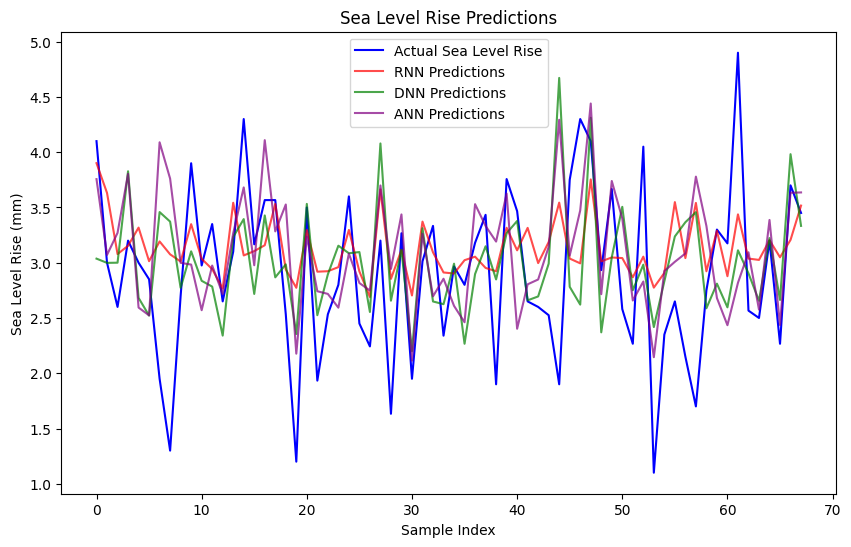

In [7]:
# 모든 모델의 예측 결과 시각화
plt.figure(figsize=(10, 6))

plt.plot(y_test.values, label="Actual Sea Level Rise", color='blue')
plt.plot(y_pred_rnn, label="RNN Predictions", color='red', alpha=0.7)
plt.plot(y_pred_dnn, label="DNN Predictions", color='green', alpha=0.7)
plt.plot(y_pred_ann, label="ANN Predictions", color='purple', alpha=0.7)

plt.legend()
plt.title("Sea Level Rise Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Sea Level Rise (mm)")
plt.show()


In [8]:
# RNN 예측 결과 출력
print("RNN Predictions vs Actual Values:")
rnn_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rnn.flatten()
})
print(rnn_results.head(10))  # 상위 10개의 결과 출력

# RNN 평균 오차 출력
rnn_mse = mean_squared_error(y_test, y_pred_rnn)
print(f"RNN Mean Squared Error: {rnn_mse}")

RNN Predictions vs Actual Values:
   Actual  Predicted
0    4.10   3.900934
1    3.00   3.631469
2    2.60   3.078176
3    3.20   3.153272
4    3.00   3.317719
5    2.85   3.013866
6    1.95   3.192569
7    1.30   3.075831
8    2.70   3.010819
9    3.90   3.348907
RNN Mean Squared Error: 0.5373418306760005


In [9]:
# DNN 예측 결과 출력
print("DNN Predictions vs Actual Values:")
dnn_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_dnn.flatten()
})
print(dnn_results.head(10))  # 상위 10개의 결과 출력

# DNN 평균 오차 출력
dnn_mse = mean_squared_error(y_test, y_pred_dnn)
print(f"DNN Mean Squared Error: {dnn_mse}")


DNN Predictions vs Actual Values:
   Actual  Predicted
0    4.10   3.036932
1    3.00   2.998669
2    2.60   3.000245
3    3.20   3.827506
4    3.00   2.682201
5    2.85   2.521570
6    1.95   3.458259
7    1.30   3.372047
8    2.70   2.772488
9    3.90   3.103070
DNN Mean Squared Error: 0.6449478043536905


In [10]:
# ANN 예측 결과 출력
print("ANN Predictions vs Actual Values:")
ann_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_ann.flatten()
})
print(ann_results.head(10))  # 상위 10개의 결과 출력

# ANN 평균 오차 출력
ann_mse = mean_squared_error(y_test, y_pred_ann)
print(f"ANN Mean Squared Error: {ann_mse}")


ANN Predictions vs Actual Values:
   Actual  Predicted
0    4.10   3.756317
1    3.00   3.070582
2    2.60   3.269873
3    3.20   3.804366
4    3.00   2.594366
5    2.85   2.523420
6    1.95   4.089828
7    1.30   3.760882
8    2.70   2.998765
9    3.90   2.983236
ANN Mean Squared Error: 0.6737938601227698


In [11]:
# 모든 모델의 예측 결과를 비교하여 출력
comparison_results = pd.DataFrame({
    'Actual': y_test.values,
    'RNN_Predicted': y_pred_rnn.flatten(),
    'DNN_Predicted': y_pred_dnn.flatten(),
    'ANN_Predicted': y_pred_ann.flatten()
})
print(comparison_results.head(10))  # 상위 10개 샘플 비교 출력

# 각 모델의 평균 제곱 오차 요약 출력
print("\nModel Performance Summary:")
print(f"RNN Mean Squared Error: {rnn_mse}")
print(f"DNN Mean Squared Error: {dnn_mse}")
print(f"ANN Mean Squared Error: {ann_mse}")


   Actual  RNN_Predicted  DNN_Predicted  ANN_Predicted
0    4.10       3.900934       3.036932       3.756317
1    3.00       3.631469       2.998669       3.070582
2    2.60       3.078176       3.000245       3.269873
3    3.20       3.153272       3.827506       3.804366
4    3.00       3.317719       2.682201       2.594366
5    2.85       3.013866       2.521570       2.523420
6    1.95       3.192569       3.458259       4.089828
7    1.30       3.075831       3.372047       3.760882
8    2.70       3.010819       2.772488       2.998765
9    3.90       3.348907       3.103070       2.983236

Model Performance Summary:
RNN Mean Squared Error: 0.5373418306760005
DNN Mean Squared Error: 0.6449478043536905
ANN Mean Squared Error: 0.6737938601227698


In [12]:
# 새로운 입력 데이터 정의
new_data = {
    'Year': [2050],
    'Country_Index': [1],  # Country Index: 1 is placeholder; match your dummies
    'Avg Temperature (°C)': [16.5],
    'CO2 Emissions (Tons/Capita)': [10],
    'Rainfall (mm)': [1200],
    'Renewable Energy (%)': [35],
    'Extreme Weather Events': [15],
    'Forest Area (%)': [25]
}

# 데이터프레임으로 변환
new_data_df = pd.DataFrame(new_data)

# Country 변수와 매칭되는 더미 변수 생성
country_columns = [col for col in X.columns if 'Country_' in col]
new_data_df = pd.get_dummies(new_data_df, columns=['Country_Index'], drop_first=True)

# 누락된 Country 더미 변수 처리
for col in country_columns:
    if col not in new_data_df.columns:
        new_data_df[col] = 0

# 열 순서 정렬 (학습 데이터와 동일한 순서)
new_data_df = new_data_df.reindex(columns=X.columns, fill_value=0)

# 데이터 스케일링
new_data_scaled = scaler.transform(new_data_df)

# RNN 예측
new_data_rnn = new_data_scaled.reshape(new_data_scaled.shape[0], new_data_scaled.shape[1], 1)
rnn_prediction = rnn_model.predict(new_data_rnn)
print(f"RNN Prediction for new input: {rnn_prediction.flatten()[0]}")

# DNN 예측
dnn_prediction = dnn_model.predict(new_data_scaled)
print(f"DNN Prediction for new input: {dnn_prediction.flatten()[0]}")

# ANN 예측
ann_prediction = ann_model.predict(new_data_scaled)
print(f"ANN Prediction for new input: {ann_prediction.flatten()[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
RNN Prediction for new input: 3.655653238296509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
DNN Prediction for new input: 5.234707355499268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
ANN Prediction for new input: 5.065162658691406


In [ ]:
# 단일 입력 데이터 구성
#input_data = pd.DataFrame({
    #'Year': [2050],
    #'Country_Index': [1],  # Country Index로 가정
    #'Avg Temperature (°C)': [16.5],
    #'CO2 Emissions (Tons/Capita)': [10],
    #'Rainfall (mm)': [1200],
    #'Population (Millions)': [8],  # 새 특성 추가
    #'Renewable Energy (%)': [35],
    #'Extreme Weather Events': [15],
    #'Forest Area (%)': [25]
#})

# 기존 데이터에 없는 새로운 컬럼 처리 (예: Population)
#if 'Population (Millions)' not in X.columns:
    #input_data['Population (Millions)'] = 0  # 특성이 없을 경우 기본값 추가


In [ ]:
# Country Index를 가정해 원-핫 인코딩 (Country 컬럼명 맞추기)
#input_data = pd.get_dummies(input_data, columns=['Country_Index'], drop_first=True)

# 누락된 컬럼 처리 (기존 데이터와 동일한 컬럼 맞추기)
#missing_cols = set(X.columns) - set(input_data.columns)
#for col in missing_cols:
    #input_data[col] = 0  # 없는 컬럼은 0으로 채우기
#input_data = input_data[X.columns]  # 컬럼 순서 정렬

# 데이터 표준화
#input_data_scaled = scaler.transform(input_data)


In [16]:
# 새로운 입력 데이터 정의
new_data = {
    'Year': [2050],
    'Country': ['UK'],  # 실제 국가 이름으로 지정 (예: 'UK', 'USA', 'France' 등)
    'Avg Temperature (°C)': [16.5],
    'CO2 Emissions (Tons/Capita)': [10],
    'Rainfall (mm)': [1200],
    'Renewable Energy (%)': [35],
    'Extreme Weather Events': [15],
    'Forest Area (%)': [25]
}

# 데이터프레임으로 변환
new_data_df = pd.DataFrame(new_data)

# Country 변수를 pd.get_dummies로 처리
new_data_df = pd.get_dummies(new_data_df, columns=['Country'], drop_first=True)

# 누락된 Country 더미 변수 처리
for col in [col for col in X.columns if 'Country_' in col]:
    if col not in new_data_df.columns:
        new_data_df[col] = 0

# 열 순서 정렬 (학습 데이터와 동일하게)
new_data_df = new_data_df.reindex(columns=X.columns, fill_value=0)

# 데이터 스케일링
new_data_scaled = scaler.transform(new_data_df)

# RNN 예측
new_data_rnn = new_data_scaled.reshape(new_data_scaled.shape[0], new_data_scaled.shape[1], 1)
rnn_prediction = rnn_model.predict(new_data_rnn)
print(f"RNN Prediction for new input: {rnn_prediction.flatten()[0]}")

# DNN 예측
dnn_prediction = dnn_model.predict(new_data_scaled)
print(f"DNN Prediction for new input: {dnn_prediction.flatten()[0]}")

# ANN 예측
ann_prediction = ann_model.predict(new_data_scaled)
print(f"ANN Prediction for new input: {ann_prediction.flatten()[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
RNN Prediction for new input: 3.655653238296509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
DNN Prediction for new input: 5.234707355499268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
ANN Prediction for new input: 5.065162658691406
